In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
import time
from scipy.stats import norm
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif, mutual_info_classif, SelectKBest
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import XGBClassifier
import statsmodels.formula.api as smf
from sklearn.preprocessing import QuantileTransformer
from sklearn.feature_selection import SelectPercentile, chi2
import seaborn as sns
from sklearn.metrics import brier_score_loss
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn import datasets, metrics, model_selection, svm
import matplotlib.pyplot as plt  # doctest: +SKIP
import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix
import pylab as pl
import itertools
from sklearn.metrics import classification_report

warnings.filterwarnings("ignore")
%matplotlib inline

# Captura dos dados

In [83]:
colunas = ["ID",
           "estado", 
           "tempo_conta", 
           "cod_area", 
           "plano_int", 
           "plano_voz_email", 
           "qtd_msg_vmail", 
           "qtd_dias_min", 
           "qtd_dias_lig", 
           "custo_dia",
           "qtd_vesp_min",
           "qtd_vesp_lig",
           "custo_vesp",
           "qtd_min_noite",
           "qtd_lig_noite",
           "custo_noite",
           "minutos_total",
           "lig_total",
           "custo_total",
           "lig_call_center",
           "target"]

treino = pd.read_csv("./Dados/projeto4_telecom_treino.csv", names = colunas, header=0 )
teste = pd.read_csv("./Dados/projeto4_telecom_teste.csv", names = colunas, header=0)

In [84]:
teste


,ID,estado,tempo_conta,cod_area,plano_int,plano_voz_email,qtd_msg_vmail,qtd_dias_min,qtd_dias_lig,custo_dia,...,qtd_vesp_lig,custo_vesp,qtd_min_noite,qtd_lig_noite,custo_noite,minutos_total,lig_total,custo_total,lig_call_center,target
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,4,NM,99,area_code_415,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,5,SC,108,area_code_415,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,1663,HI,50,area_code_408,no,yes,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no
1663,1664,WV,152,area_code_415,no,no,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,yes
1664,1665,DC,61,area_code_415,no,no,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,no
1665,1666,DC,109,area_code_510,no,no,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,no


# Funções 

In [88]:
def mudacategoria(dataframe):
    dataframe["target"] = [1 if x == "yes" else 0 for x in dataframe["target"]]
    dataframe["plano_int"] = [1 if x == "yes" else 0 for x in dataframe["plano_int"]]
    dataframe["plano_voz_email"] = [1 if x == "yes" else 0 for x in dataframe["plano_voz_email"]]
    dataframe["cod_area"] = [0 if x == "area_code_408" else 1 if x == "area_code_415" else 2 for x in dataframe["cod_area"]]
    return

In [5]:
def Relacao_var(variavel, target):
    VlrRel = treino[target].corr(treino[variavel])
    listvlr.append([variavel, VlrRel])
    return

In [94]:
def avaliamodelo(X1, y1):
    num_folds = 10
    seed = 7

# Preparando a lista de modelos
    modelos = []
    modelos.append(('LR', LogisticRegression()))
    modelos.append(('LDA', LinearDiscriminantAnalysis()))
    modelos.append(('NB', GaussianNB()))
    modelos.append(('KNN', KNeighborsClassifier()))
    modelos.append(('CART', DecisionTreeClassifier()))
    modelos.append(('SVM', SVC()))
    modelos.append(('ADA', AdaBoostClassifier()))
    modelos.append(('GBM', GradientBoostingClassifier()))
    modelos.append(('RF', RandomForestClassifier()))
    modelos.append(('XGB', XGBClassifier()))

# Avaliando cada modelo em um loop
    resultados = []
    nomes = []

    for nome, modelo in modelos:
        kfold = KFold(n_splits = num_folds, random_state = seed)
        cv_results = cross_val_score(modelo, X1, y1, cv = kfold, scoring = 'accuracy')
        resultados.append(cv_results.mean())
        nomes.append(nome)
        msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
        print(msg)
    return(nomes, resultados)

In [43]:
# Escalar as variaveis e verficar o modelo  
def imputaScala(nrlinha, dados, dataframe):
    dataframe.loc[[nrlinha], colunaScala] = dados
    return

In [8]:
def imputaSelecao(campo, dados, linha):
    global df_selecao
    df_selecao[campo][linha] = dados
    return

In [96]:
def avaliaModeloLR(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(penalty="l2")
    parametros = clf.get_params()
    name = "LogisticRegression"
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    prob_pos = clf.predict_proba(X_test)

    prob_pos1 = prob_pos[:,1]
    clf_score = brier_score_loss(y_test, prob_pos1, pos_label=1)

    print("%s:" % name)
    print("\tBrier: %1.3f" % (clf_score))
    print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
    print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
    print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))
    return([y_pred, prob_pos])

In [70]:
def MatrixConfusiion(y_test, y_pred):
    normalize = False
    cm  = confusion_matrix(y_test, y_pred)
    pl.figure(figsize=(6, 4))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['NO', 'YES']); ax.yaxis.set_ticklabels(['NO', 'YES']);
    print(classification_report(y_test, y_pred, target_names= ["NO", "YES"]))
    return

In [11]:
# over-sampling

def oversamplig (dataframe):
    # CONTAR CLASSES
    count_class_00, count_class_01 = dataframe.target.value_counts()

    # Divide by class
    df_class_00 = dataframe[dataframe['target'] == 0]
    df_class_01 = dataframe[dataframe['target'] == 1]

    df_class_1_over = df_class_01.sample(count_class_00, replace= True)
    df_treino_over = pd.concat([df_class_00, df_class_1_over], axis=0)
    df_treino_over = df_treino_over.reset_index(drop=True)
    print('Random over-sampling:')
    print(df_treino_over.target.value_counts())
    df_treino_over.target.value_counts().plot(kind='bar', title='Count (TARGET)' ,color = ['#1F77B4', '#FF7F0E']);
    return(df_treino_over)

In [12]:
def VerTarget(dataframe):
    target_count = dataframe.target.value_counts()
    print('Class 0:', target_count[0])
    print('Class 1:', target_count[1])
    print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
    target_count.plot(kind='bar', title='Count (TARGET)',color = ['#1F77B4', '#FF7F0E']);

In [13]:
def ScalaVariaveis(dataframe):

    selectCol = dataframe.loc[:, colunaScala]

    scaler = QuantileTransformer()
    colScala = scaler.fit_transform(selectCol)
    return(colScala)

# Define as Variáveis

In [46]:
colunaScala = ["tempo_conta",
               "qtd_msg_vmail", 
               "qtd_dias_min",
               "qtd_dias_lig", 
               "qtd_vesp_min", 
               "qtd_vesp_lig", 
               "qtd_min_noite", 
               "qtd_lig_noite", 
               "minutos_total", 
               "lig_total", 
               "lig_call_center" ]


#  DataFrame

In [ ]:
treino

# Análise das Variáveis 

In [ ]:
treino.info()

In [ ]:
# Quantitativas
    # Discretas - 7
    # Continuas - 6
    # ID - 1
    # Binaria - 3 com a Target

# Qualitativas
    # Normais - 2
    # Ordinais- 1

# Retirando a ID - Irrelevante para o nosso modelo

In [14]:
treino.drop(["ID"], axis=1, inplace=True)

# Análise das Variáveis

In [15]:
treino.groupby(['plano_int'])['tempo_conta'].sum()

plano_int
no     303234
yes     33615
Name: tempo_conta, dtype: int64

In [16]:
treino.groupby(['plano_int'])['plano_int'].count()

plano_int
no     3010
yes     323
Name: plano_int, dtype: int64

In [17]:
treino.groupby(['lig_call_center'])['tempo_conta'].sum()

lig_call_center
0     70608
1    120202
2     75312
3     43515
4     17042
5      6769
6      1984
7      1045
8       167
9       205
Name: tempo_conta, dtype: int64

In [18]:
treino.groupby(['cod_area'])['lig_call_center'].sum()

cod_area
area_code_408    1273
area_code_415    2572
area_code_510    1364
Name: lig_call_center, dtype: int64

In [19]:
treino.groupby(['cod_area'])['lig_total'].sum()

cod_area
area_code_408    3709
area_code_415    7550
area_code_510    3671
Name: lig_total, dtype: int64

In [20]:
treino.groupby(['cod_area'])['qtd_dias_min', 'qtd_min_noite' ].sum()

,qtd_dias_min,qtd_min_noite
cod_area,,
area_code_408,148473.0,166941.9
area_code_415,300535.8,334372.2
area_code_510,150181.6,168192.4


In [21]:
treino.groupby(['cod_area'])['qtd_dias_lig', 'qtd_lig_noite' ].sum()

,qtd_dias_lig,qtd_lig_noite
cod_area,,
area_code_408,84216,82995
area_code_415,166454,166159
area_code_510,84082,84505


In [22]:
treino.groupby(['cod_area'])['custo_dia', 'custo_noite' ].sum()

,custo_dia,custo_noite
cod_area,,
area_code_408,25240.79,7512.49
area_code_415,51092.06,15046.92
area_code_510,25531.32,7568.66


In [ ]:
# a maioria das ligasções ao CallCenter partiram da área 1 - area_code_415.
# Tatal de ligações desta área é maior. não tem como saber se existe relação, teriamos que saber os motivos das reclamações
# Um fato interessante que as quantidades de dia e de noite são aproximadamente iguais, mas, 
# as pessoas falam mais tempo ao telefone no período noturno, a explicação que eu cheguei que a taxa por minuto diurno é mais barata
# Uma tendencia: Quanto maior o numero de ligação ao call center menor o tempo de conta 

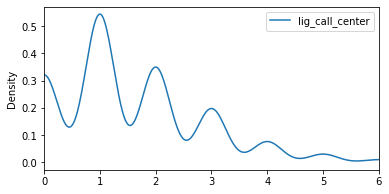

In [23]:
treino.plot.density(y='lig_call_center',xlim=[0,6],figsize=[6,3])

In [ ]:
# Grande maioria fez pelo menos uma ou duas ligações ao call center, grande parte não fizeram qualquer ligação.

# Grafico de Distribuição - Desvio Padrão

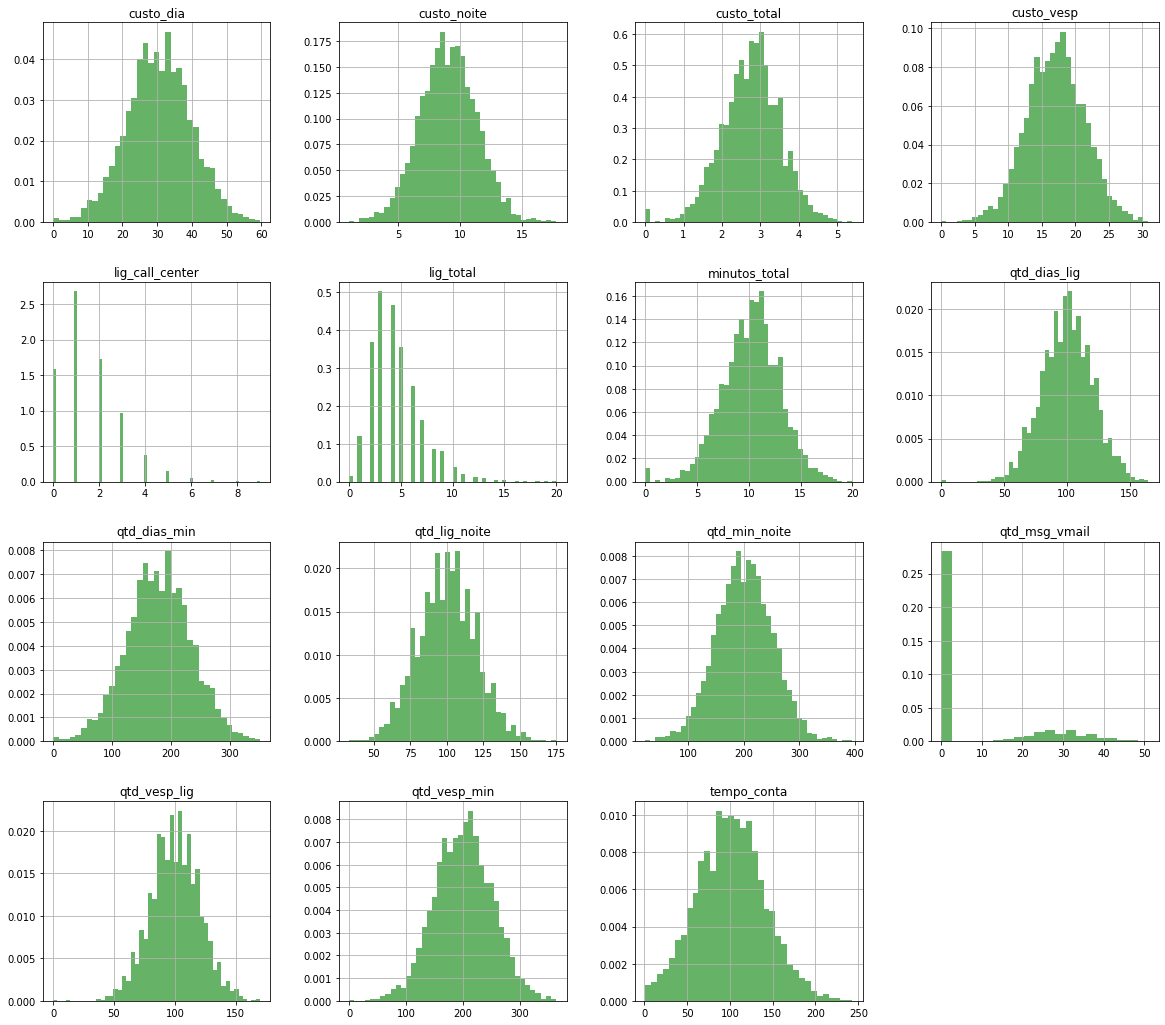

In [24]:
treino.hist(bins='auto', density=True, alpha=0.6, color='g')
plt.gcf().set_size_inches(20, 18)
plt.show()

In [ ]:
# Primeiramente percebemos que a diferença da quantidade da TARGET está muito diferente Cancela e não Cancelar o plano
# Boa parte das variáveis estão em distribuição normal, não precisando de normaliza-las
# Variáveis com outliers como os outlies tratam de quantidades não farei a normalização das variáveis em primeiro momento 

# BoxPlot para verificação dos OutLiers

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Text xticklabel objects>)

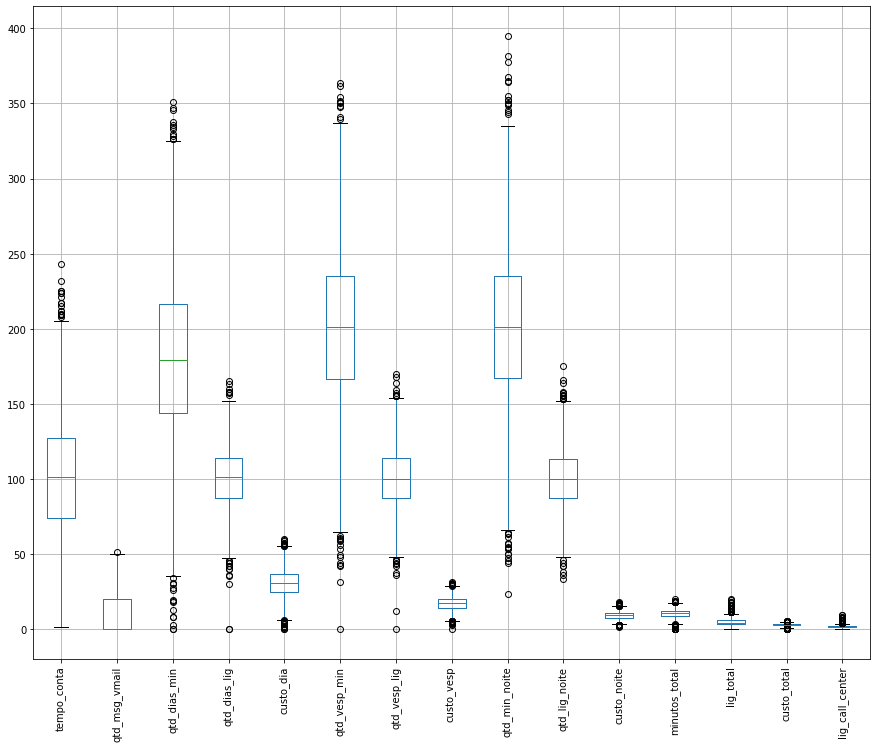

In [25]:
treino.boxplot()
plt.gcf().set_size_inches(15, 12)
plt.xticks(rotation=90)

In [ ]:
# O BoxPlot confirma a primeira análise feita no gráfico anterior 

# Verifica as variáveis faltantes Variaveis Faltantes 

In [26]:
treino.isnull().sum().sort_values(ascending = False)[:10]

target             0
lig_call_center    0
tempo_conta        0
cod_area           0
plano_int          0
plano_voz_email    0
qtd_msg_vmail      0
qtd_dias_min       0
qtd_dias_lig       0
custo_dia          0
dtype: int64

In [ ]:
# Não temos valores Missing para nenhuma variável

# Analisando as variáveis 

In [27]:
treino.describe()

,tempo_conta,qtd_msg_vmail,qtd_dias_min,qtd_dias_lig,custo_dia,qtd_vesp_min,qtd_vesp_lig,custo_vesp,qtd_min_noite,qtd_lig_noite,custo_noite,minutos_total,lig_total,custo_total,lig_call_center
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
# As variáveis que se relacionam a quantidade então com Min e Max com uma distancia muito grande, distante da média
# farei uma padronização para essas variáveis 

# Tabela de Correlação para verificar a relação entre as variáveis 

In [28]:
treino.corr(method = 'pearson')

,tempo_conta,qtd_msg_vmail,qtd_dias_min,qtd_dias_lig,custo_dia,qtd_vesp_min,qtd_vesp_lig,custo_vesp,qtd_min_noite,qtd_lig_noite,custo_noite,minutos_total,lig_total,custo_total,lig_call_center
tempo_conta,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
qtd_msg_vmail,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
qtd_dias_min,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
qtd_dias_lig,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
custo_dia,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
qtd_vesp_min,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
qtd_vesp_lig,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
custo_vesp,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
qtd_min_noite,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288
qtd_lig_noite,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802


# Mapa de Calor para correlação das Variáveis - PEARSON

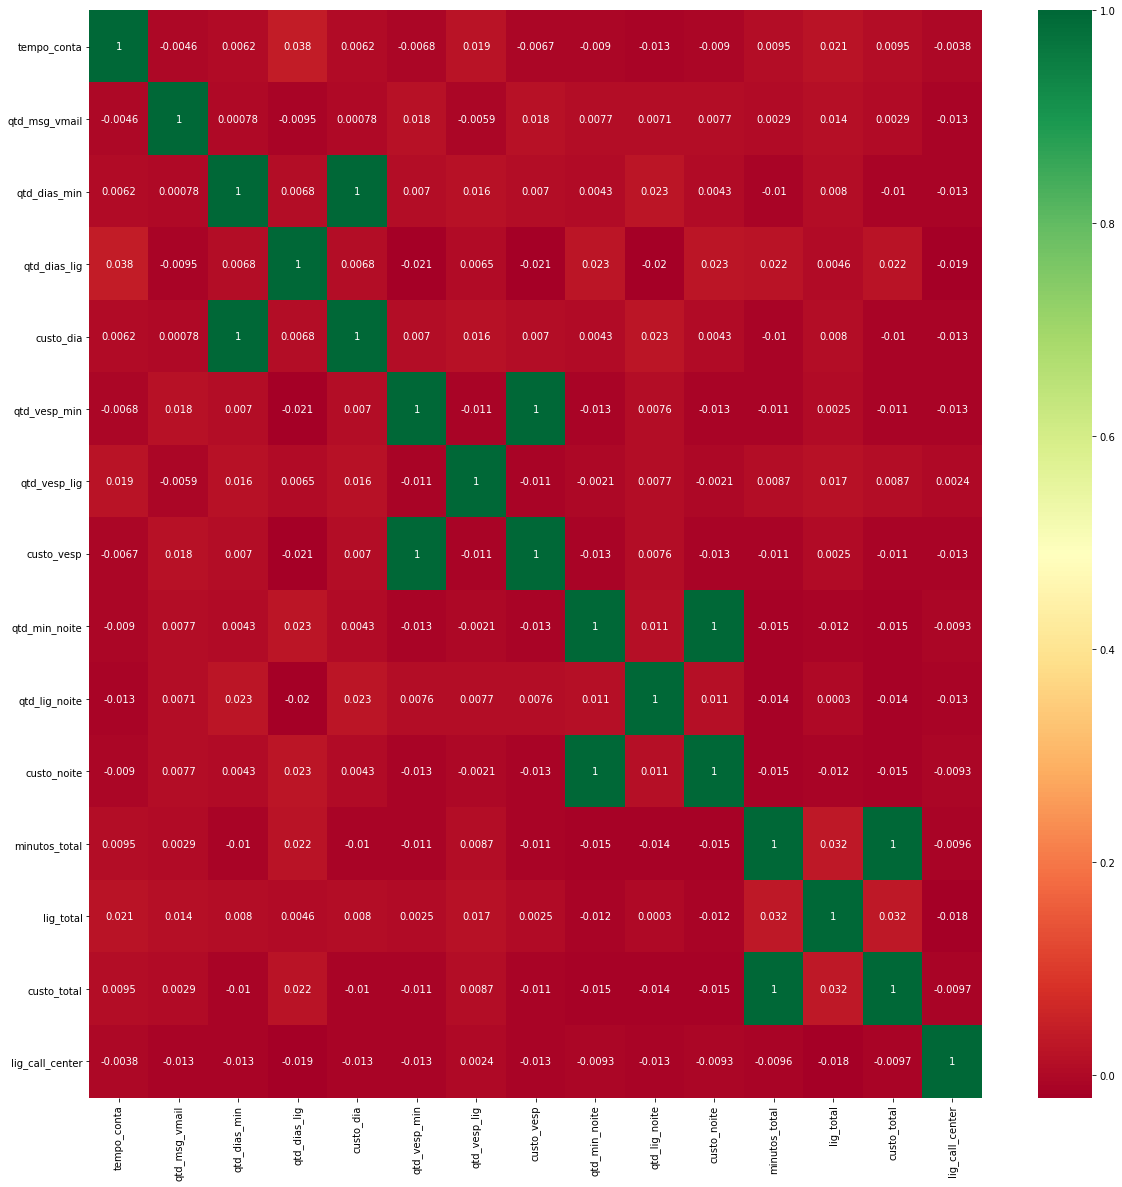

In [29]:
corrmat = treino.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(treino[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Mapa de Calor para correlação das Variáveis - SPEARMAN

In [30]:
treino.corr(method = 'spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap("coolwarm"), axis=1)

,tempo_conta,qtd_msg_vmail,qtd_dias_min,qtd_dias_lig,custo_dia,qtd_vesp_min,qtd_vesp_lig,custo_vesp,qtd_min_noite,qtd_lig_noite,custo_noite,minutos_total,lig_total,custo_total,lig_call_center
tempo_conta,1.0,0.0031,0.018,0.033,0.018,-0.008,0.018,-0.008,-0.014,-0.0077,-0.014,0.015,0.027,0.015,-0.0059
qtd_msg_vmail,0.0031,1.0,0.004,-0.012,0.004,0.021,-0.0071,0.021,0.0051,0.011,0.005,-0.0016,0.0062,-0.0016,-0.02
qtd_dias_min,0.018,0.004,1.0,0.0094,1.0,0.0064,0.018,0.0064,-0.0057,0.023,-0.0057,-0.016,-0.00029,-0.016,-0.015
qtd_dias_lig,0.033,-0.012,0.0094,1.0,0.0094,-0.014,0.014,-0.014,0.019,-0.018,0.019,0.015,0.0041,0.015,-0.021
custo_dia,0.018,0.004,1.0,0.0094,1.0,0.0064,0.018,0.0064,-0.0057,0.023,-0.0057,-0.016,-0.00029,-0.016,-0.015
qtd_vesp_min,-0.008,0.021,0.0064,-0.014,0.0064,1.0,-0.01,1.0,-0.013,0.0034,-0.013,-0.0032,0.014,-0.0032,-0.018
qtd_vesp_lig,0.018,-0.0071,0.018,0.014,0.018,-0.01,1.0,-0.01,0.0049,0.0056,0.0049,0.00021,0.015,0.00021,0.0027
custo_vesp,-0.008,0.021,0.0064,-0.014,0.0064,1.0,-0.01,1.0,-0.013,0.0034,-0.013,-0.0032,0.014,-0.0032,-0.018
qtd_min_noite,-0.014,0.0051,-0.0057,0.019,-0.0057,-0.013,0.0049,-0.013,1.0,0.0086,1.0,-0.01,0.00048,-0.01,-0.013
qtd_lig_noite,-0.0077,0.011,0.023,-0.018,0.023,0.0034,0.0056,0.0034,0.0086,1.0,0.0086,-0.0064,-0.0031,-0.0064,-0.0081


In [ ]:
# Variáveis com forte relação entre elas quantidade de mensagem VozEmail com plano de voz-email que faz total coerencia 
# Para enviar tem que ter o plano habilitado
# Quantidade de dias de ligação com minutos de ligação que faz total sentido 
# Segue o mesmmo padrão outras variáveis com forte relação
# Entre os dois métodos o gráfico se manteve 

# Mudancas das categorias YES para 1 e NO para 0 e os Código de Áreas para 0, 1 e 2 

In [110]:
mudacategoria(treino)

# Correlação da Target com outras variáveis PEARSON

In [33]:
listvlr = []
VarInd  = ["tempo_conta", 
           "cod_area", 
           "plano_int", 
           "plano_voz_email", 
           "qtd_msg_vmail", 
           "qtd_dias_min", 
           "qtd_dias_lig", 
           "custo_dia",
           "qtd_vesp_min",
           "qtd_vesp_lig",
           "custo_vesp",
           "qtd_min_noite",
           "qtd_lig_noite",
           "custo_noite",
           "minutos_total",
           "lig_total",
           "custo_total",
           "lig_call_center"]

[Relacao_var(var, "target") for var in VarInd]

resultado = pd.DataFrame(listvlr, columns=['Variavel_Ind', 'Relacao'])
print("Relação entre a Variavel Conta")
resultado.sort_values(by = ["Relacao"], ascending = False, axis = 0)

Relação entre a Variavel Conta


,Variavel_Ind,Relacao
2,plano_int,0.259852
17,lig_call_center,0.208750
5,qtd_dias_min,0.205151
7,custo_dia,0.205151
8,qtd_vesp_min,0.092796
10,custo_vesp,0.092786
16,custo_total,0.068259
14,minutos_total,0.068239
13,custo_noite,0.035496
11,qtd_min_noite,0.035493


In [ ]:
# Essa relação da conta não entendi, a descriçao do campo account_length,
# acredito que seja tempo de conta. Se for issso mesmo justifica a relação forte das tres primeiras variaveis 

# Correlação da Plano Internacional com outras variáveis PEARSON

In [34]:
listvlr = []
VarInd  = ["target",
           "tempo_conta", 
           "cod_area", 
           "plano_voz_email", 
           "qtd_msg_vmail", 
           "qtd_dias_min", 
           "qtd_dias_lig", 
           "custo_dia",
           "qtd_vesp_min",
           "qtd_vesp_lig",
           "custo_vesp",
           "qtd_min_noite",
           "qtd_lig_noite",
           "custo_noite",
           "minutos_total",
           "lig_total",
           "custo_total",
           "lig_call_center"]

[Relacao_var(var, "plano_int") for var in VarInd]

resultado = pd.DataFrame(listvlr, columns=['Variavel_Ind', 'Relacao'])
print("Relação entre a Variavel Plano Internacional")
resultado.sort_values(by = ["Relacao"], ascending = False, axis = 0)

Relação entre a Variavel Plano Internacional


,Variavel_Ind,Relacao
0,target,0.259852
7,custo_dia,0.049398
5,qtd_dias_min,0.049396
14,minutos_total,0.045871
16,custo_total,0.045780
2,cod_area,0.044033
1,tempo_conta,0.024735
10,custo_vesp,0.019106
8,qtd_vesp_min,0.019100
15,lig_total,0.017366


In [ ]:
# Nenhuma relação, somente com a target.

# Verificando a Variável - Target

In [35]:
treino.groupby(["target"]).size()

target
0    2850
1     483
dtype: int64

Class 0: 2850
Class 1: 483
Proportion: 5.9 : 1


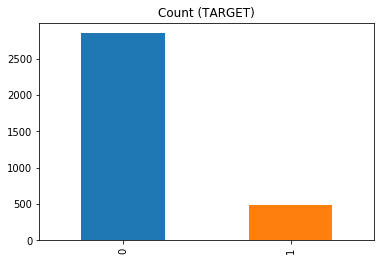

In [36]:
VerTarget(treino)

In [ ]:
# Temos mais a categoria SIM do que NÂO, vamos nivelar para o Algoritimo não aprender mais de uma do que a outra

# Avaliação do modelo antes das transformações

In [37]:
resultado_modelo = []

# Antes das Transformações

In [38]:
X1 = treino.drop(['target', "estado"], axis=1)
y1 = treino['target']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.70, random_state=0)

# Antes das transformações

In [39]:
Resp_modelos = avaliamodelo(X1, y1)

LR: 0.849373 (0.022773)
LDA: 0.853572 (0.019927)
NB: 0.864686 (0.014736)
KNN: 0.877270 (0.023727)
CART: 0.918692 (0.010939)
SVM: 0.855970 (0.027292)
ADA: 0.874583 (0.017782)
GBM: 0.953498 (0.011717)
RF: 0.952899 (0.014635)
XGB: 0.952896 (0.011074)


# Grava Resultado Antes das Transformações Para Gerar Gráfico

In [40]:
resultado_modelo = pd.DataFrame(Resp_modelos[0], columns=['Modelo'])
resultado_modelo["Sem_Scala"] = Resp_modelos[1]

# Transformações 

# Nivelando a Target

# Usando o over-fiting para Nivelar a Target

Random over-sampling:
1    2850
0    2850
Name: target, dtype: int64


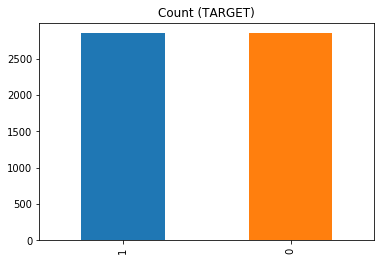

In [41]:
df_over = oversamplig(treino)

# Scalando as Variáveis

# Scala e  Grava as escalas no Dataframe

In [47]:
# Grava as Escalas no DataFrame treino
Col_Scala = ScalaVariaveis(df_over)
x = [imputaScala(nrlinha, Col_Scala[nrlinha], df_over) for nrlinha in range(len(Col_Scala))]

# Grava Modelo com Variáveis Alteradas para Gerar o Gráfico

In [50]:
XT = df_over.drop(['target', "estado"], axis=1)
yT = df_over['target']
XT_train, XT_test, yT_train, yT_test = train_test_split(X1, y1, test_size=0.70, random_state=0)

In [51]:
Resp_modelos = avaliamodelo(XT, yT)
resultado_modelo["Com_Scala"] = Resp_modelos[1]

LR: 0.654912 (0.016681)
LDA: 0.657368 (0.011691)
NB: 0.713860 (0.031447)
KNN: 0.835614 (0.096009)
CART: 0.970877 (0.027249)
SVM: 0.669825 (0.192237)
ADA: 0.804211 (0.024589)
GBM: 0.902281 (0.032407)
RF: 0.990877 (0.007759)
XGB: 0.897193 (0.037955)


# Gráfico Comparativos dos Modelos com e sem scala

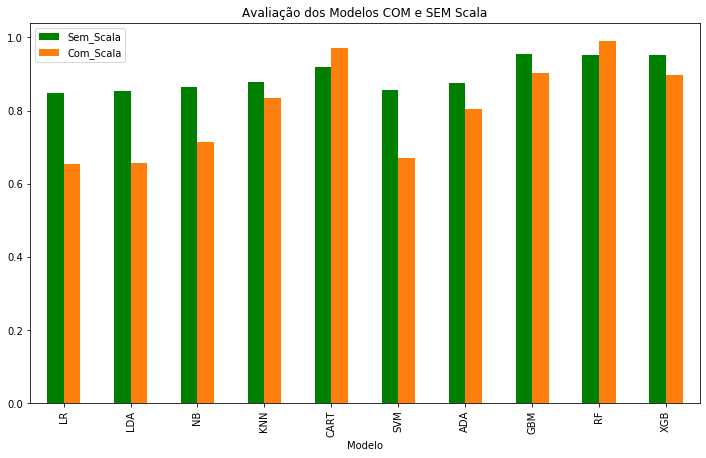

In [52]:
resultado_modelo.plot(kind='bar', x = "Modelo", figsize = (12,7), 
                      title='Avaliação dos Modelos COM e SEM Scala' ,color = ['green', '#FF7F0E'])

In [ ]:
# A regressão Linear após a SCALA teve uma performance menor significativa

In [ ]:
# Após Scalar as variáveis tivemos uma piora para alguns modelos, melhora em dois mmodelos(CART E RF)

# Features Selection 

# Seleção das Features - RANDOM FLOREST

In [53]:
df_selecao = pd.DataFrame(columns = colunas)
df_selecao.drop(["ID", "estado", "target"], axis=1, inplace=True)

In [54]:
# feature extraction
model = RandomForestClassifier(n_estimators=10)
model.fit(X1, y1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X1.columns,
                                   columns=['IMPORTANCIA']).sort_values('IMPORTANCIA', ascending=False)

In [56]:
new_row = {"tempo_conta" : "NaN"}
df_selecao = df_selecao.append(new_row, ignore_index=True)
x  = [imputaSelecao(feature_importances.index[i], feature_importances["IMPORTANCIA"][i], len(df_selecao) - 1) for i in range(len(feature_importances))]

# Seleção das Features - MUTUAL

In [57]:
mi = mutual_info_classif(X1_train, y1_train)
mi1 = pd.DataFrame(columns =  ["CAMPO","IMPORTANCIA"])
mi1["CAMPO"] = X1_train.columns
mi1["IMPORTANCIA"] = pd.Series(mi)

In [58]:
new_row = {"tempo_conta" : "99999"}
df_selecao = df_selecao.append(new_row, ignore_index=True)
x  = [imputaSelecao(mi1["CAMPO"][i], mi1["IMPORTANCIA"][i], len(df_selecao) - 1) for i in range(len(mi1))]

# Seleção - Método: SelectKBest 

In [59]:
bestfeatures = SelectKBest(score_func=chi2, k=18)
fit = bestfeatures.fit(X1,y1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X1.columns)
#concat two dataframes for better visualization 

scaler = QuantileTransformer()
colScala = pd.DataFrame(scaler.fit_transform(dfscores))

featureScores = pd.concat([dfcolumns,colScala],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [60]:
new_row = {"tempo_conta" : "NaN"}
df_selecao = df_selecao.append(new_row, ignore_index=True)
x  = [imputaSelecao(featureScores["Specs"][i], featureScores["Score"][i], len(df_selecao) - 1) for i in range(len(featureScores))]

# Seleção - Método: ExtraTreesClassifier 

In [61]:
model = ExtraTreesClassifier()
model.fit(X1,y1)
dfscores = pd.DataFrame(model.feature_importances_)
dfcolumns = pd.DataFrame(X1.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 

In [62]:
new_row = {"tempo_conta" : "NaN"}
df_selecao = df_selecao.append(new_row, ignore_index=True)
x  = [imputaSelecao(featureScores["Specs"][i], featureScores["Score"][i], len(df_selecao) - 1) for i in range(len(featureScores))]

# Gráfico com a media Dos modelos FeatureSelection

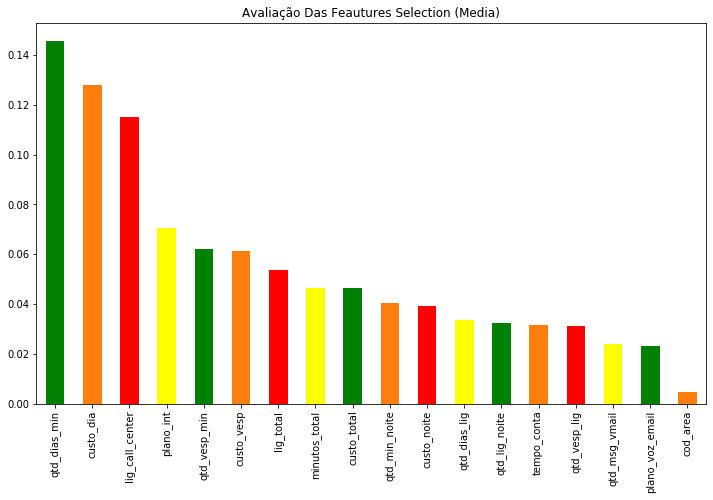

In [63]:
Media_Scores  = df_selecao.median().sort_values(ascending = False)

Media_Scores.plot(kind='bar',  figsize = (12,7), 
                      title='Avaliação Das Feautures Selection (Media)' ,color = ['green', '#FF7F0E', "red", "yellow"])

In [ ]:
# Analisando as médias, as melhores variaveis estão correspondendo com o Graficos de Mapa de Calor

# Modelo de Treino

# Sem Transformações

In [111]:
X = treino[Media_Scores.index[0:11]]
y = treino['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=0)
predS = avaliaModeloLR(X_train, X_test, y_train, y_test)

LogisticRegression:
	Brier: 0.108
	Precision: 0.475
	Recall: 0.141
	F1: 0.218



# Matrix de Confusão Sem Transformação 

              precision    recall  f1-score   support

          NO       0.87      0.97      0.92      2001
         YES       0.47      0.14      0.22       333

    accuracy                           0.86      2334
   macro avg       0.67      0.56      0.57      2334
weighted avg       0.82      0.86      0.82      2334



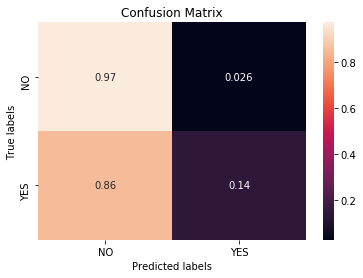

In [112]:
MatrixConfusiion(y_test, predS[0])

In [ ]:
# Sem as Transformações o modelo errou mais em YES e acertou mais em NO

# Com Transformação

In [122]:
X1 = df_over[Media_Scores.index[0:10]]
y1 = df_over['target']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.70, random_state=0)
predCT = avaliaModeloLR(X1_train, X1_test, y1_train, y1_test)

LogisticRegression:
	Brier: 0.189
	Precision: 0.726
	Recall: 0.714
	F1: 0.720



# Matrix de Confusão Com Transformação 

              precision    recall  f1-score   support

          NO       0.72      0.74      0.73      2013
         YES       0.73      0.71      0.72      1977

    accuracy                           0.72      3990
   macro avg       0.72      0.72      0.72      3990
weighted avg       0.72      0.72      0.72      3990



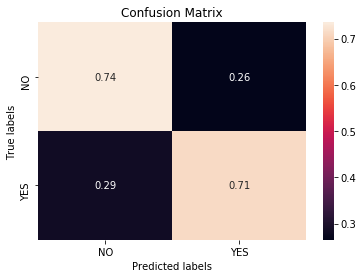

In [123]:
MatrixConfusiion(y1_test, predCT[0])

In [ ]:
# Após a SCALA tivemos uma melhora no Modelo acertando mais as TARGET
# Aumentando ou reduzindo a quantidade de variáveis não tivemos melhora, a melhor composição foi essa

# Testar o Modelo com a Base de Teste

# Transformando Dados da Base de Teste

Class 0: 1443
Class 1: 224
Proportion: 6.44 : 1


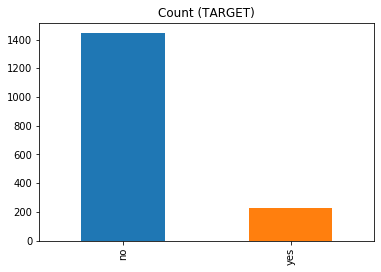

In [72]:
VerTarget(teste)

In [85]:
teste.drop(["ID"], axis=1, inplace=True)

In [89]:
mudacategoria(teste)

Random over-sampling:
1    1443
0    1443
Name: target, dtype: int64


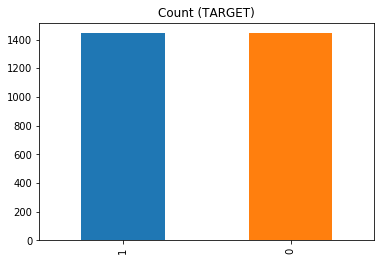

In [90]:
Over_teste = oversamplig(teste)

In [137]:
Col_Scala_teste = ScalaVariaveis(Over_teste)
x = [imputaScala(nrlinha, Col_Scala_teste[nrlinha], Over_teste) for nrlinha in range(len(Col_Scala_teste))]

In [138]:
X1 = Over_teste[Media_Scores.index[0:10]]
y1 = Over_teste['target']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.70, random_state=0)
predCT_teste = avaliaModeloLR(X1_train, X1_test, y1_train, y1_test)

LogisticRegression:
	Brier: 0.180
	Precision: 0.735
	Recall: 0.714
	F1: 0.725



              precision    recall  f1-score   support

          NO       0.72      0.74      0.73      1013
         YES       0.74      0.71      0.72      1008

    accuracy                           0.73      2021
   macro avg       0.73      0.73      0.73      2021
weighted avg       0.73      0.73      0.73      2021



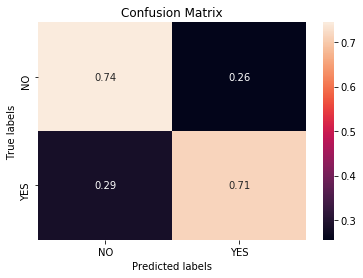

In [140]:
MatrixConfusiion(y1_test, predCT_teste[0])

In [141]:
probabilidade = pd.DataFrame(predCT_teste[1] * 100, columns=['NO', 'YES'])
probabilidade

,NO,YES
0,61.722911,38.277089
1,57.073590,42.926410
2,29.966629,70.033371
3,38.849817,61.150183
4,64.862531,35.137469
...,...,...
2016,53.635510,46.364490
2017,66.825574,33.174426
2018,93.561166,6.438834
2019,69.178932,30.821068
